# Práctica 3
## Ejercicio 1
### Interpolación



#####  Interpolar con 10 puntos generados de la función de Runge $f(x) = \frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ equidistantes. Hacer la gráfica con $10,000$ puntos en el mismo intervalo. Utilizar polyfit para el polinomio interpolador y splines cúbicos.

### Polyfit


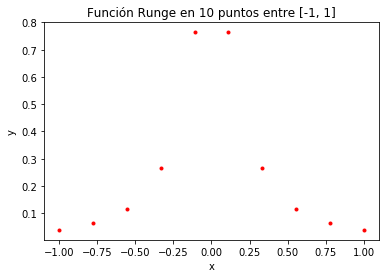

In [5]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

def f_runge(x):
    return 1/(1+(25*(x**2)))

#intervalo [a,b]
a = -1
b = 1

np.set_printoptions(precision = 2) #que se imprima mejor en la pantalla
n_points = 10

#10 puntos equidistantes entre -1 y 1
x = np.linspace(a,b,n_points)

#evaluar x en la función de runge
y = f_runge(x)

plt.plot(x,y, 'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función Runge en 10 puntos entre [-1, 1]')
plt.show()

In [2]:
polynomial_grade = n_points - 1
polynomial_coefficients = np.polyfit(x, y, polynomial_grade)
pprint(polynomial_coefficients)

array([ 3.96e-13,  2.16e+01, -7.20e-13, -4.49e+01,  3.86e-13,  3.07e+01,
       -5.84e-14, -8.26e+00, -8.80e-16,  8.62e-01])


Nuestro polinomio es
$$
p(x) = (3.96\times10^{-13})x^9 + (21.6)x^8 - (7.20\times10^{-13})x^7 - (44.9)x^6  + (3.86\times10^{-13})x^5 + (30.7)x^4 - (5.84\times10^{-14})x^3 - (8.26)x^2 - (8.8\times10^{-16})x + 0.862
$$

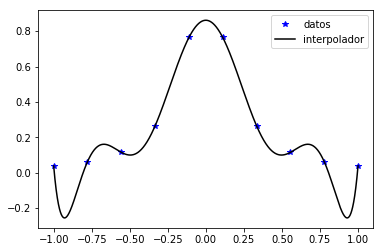

In [3]:
#interpolate
number_of_points = 10000
xeval = np.linspace(min(x),max(x), number_of_points)
yeval = np.polyval(polynomial_coefficients, xeval)

plt.plot(x, y, 'b*', xeval, yeval, 'k-')
plt.legend(['datos','interpolador'], loc='best')
plt.show()

***
### splines cúbicos

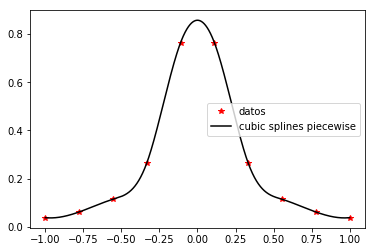

In [6]:
from scipy.interpolate import interp1d
piecewise_spline = interp1d(x, y, kind = 'cubic') #spline piecewise 

#xeval no cambia
yeval_cubic_splines = piecewise_spline(xeval)
plt.plot(x, y, 'r*',xeval, yeval_cubic_splines, 'k-')
plt.legend(['datos','cubic splines piecewise'], loc='best')
plt.show()

---
## Gráfica de comparación


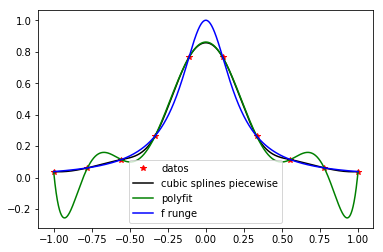

In [11]:
plt.plot(x, y, 'r*',xeval, yeval_cubic_splines, 'k-', xeval, yeval, 'g-', xeval, f_runge(xeval), 'b-')
plt.legend(['datos','cubic splines piecewise', 'polyfit', 'f runge'], loc='best')
plt.show()